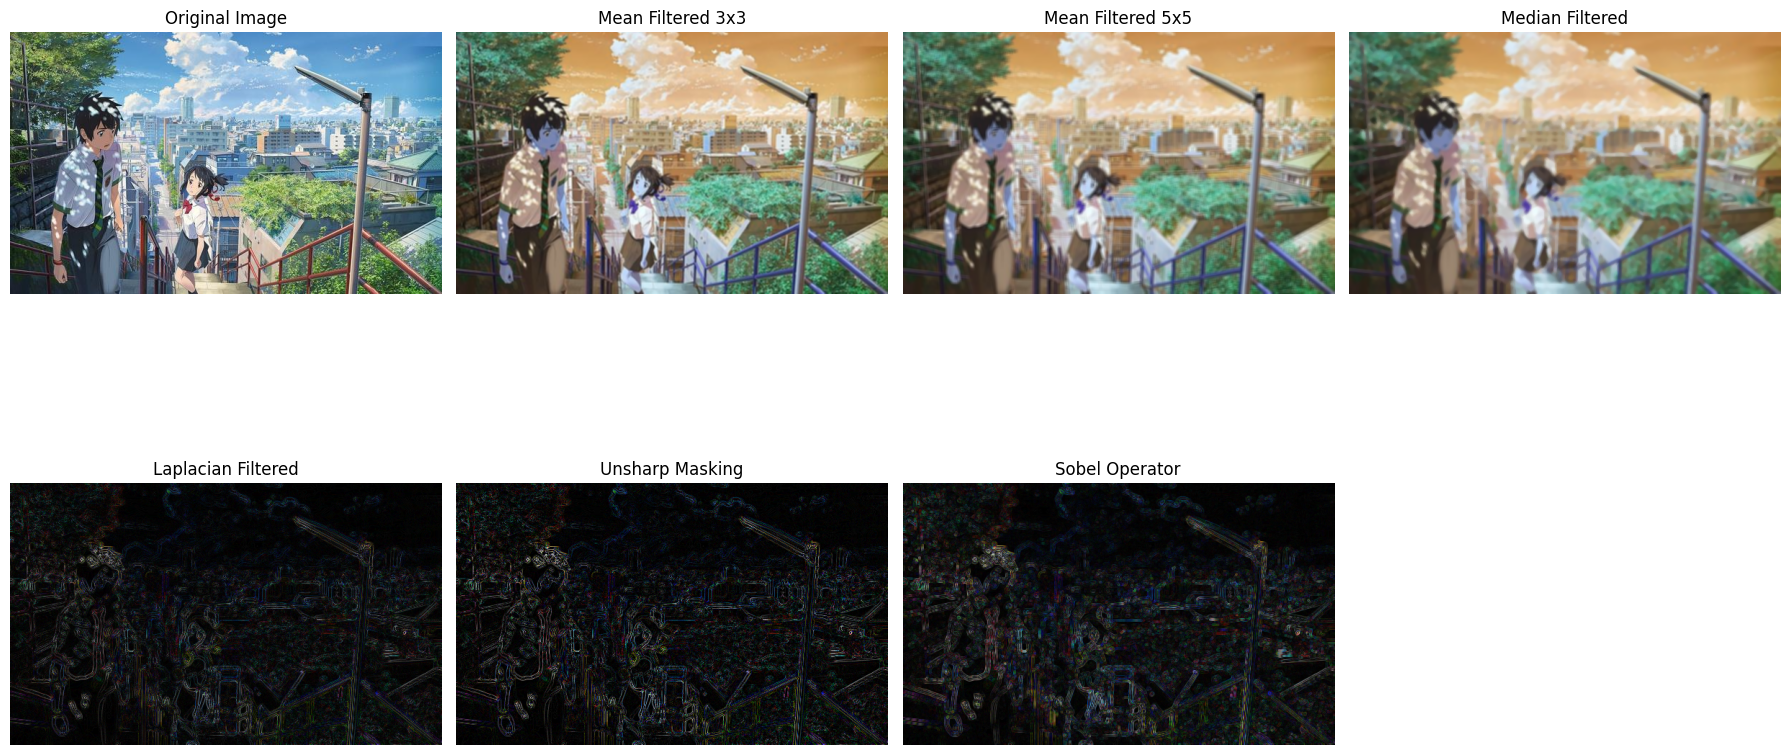

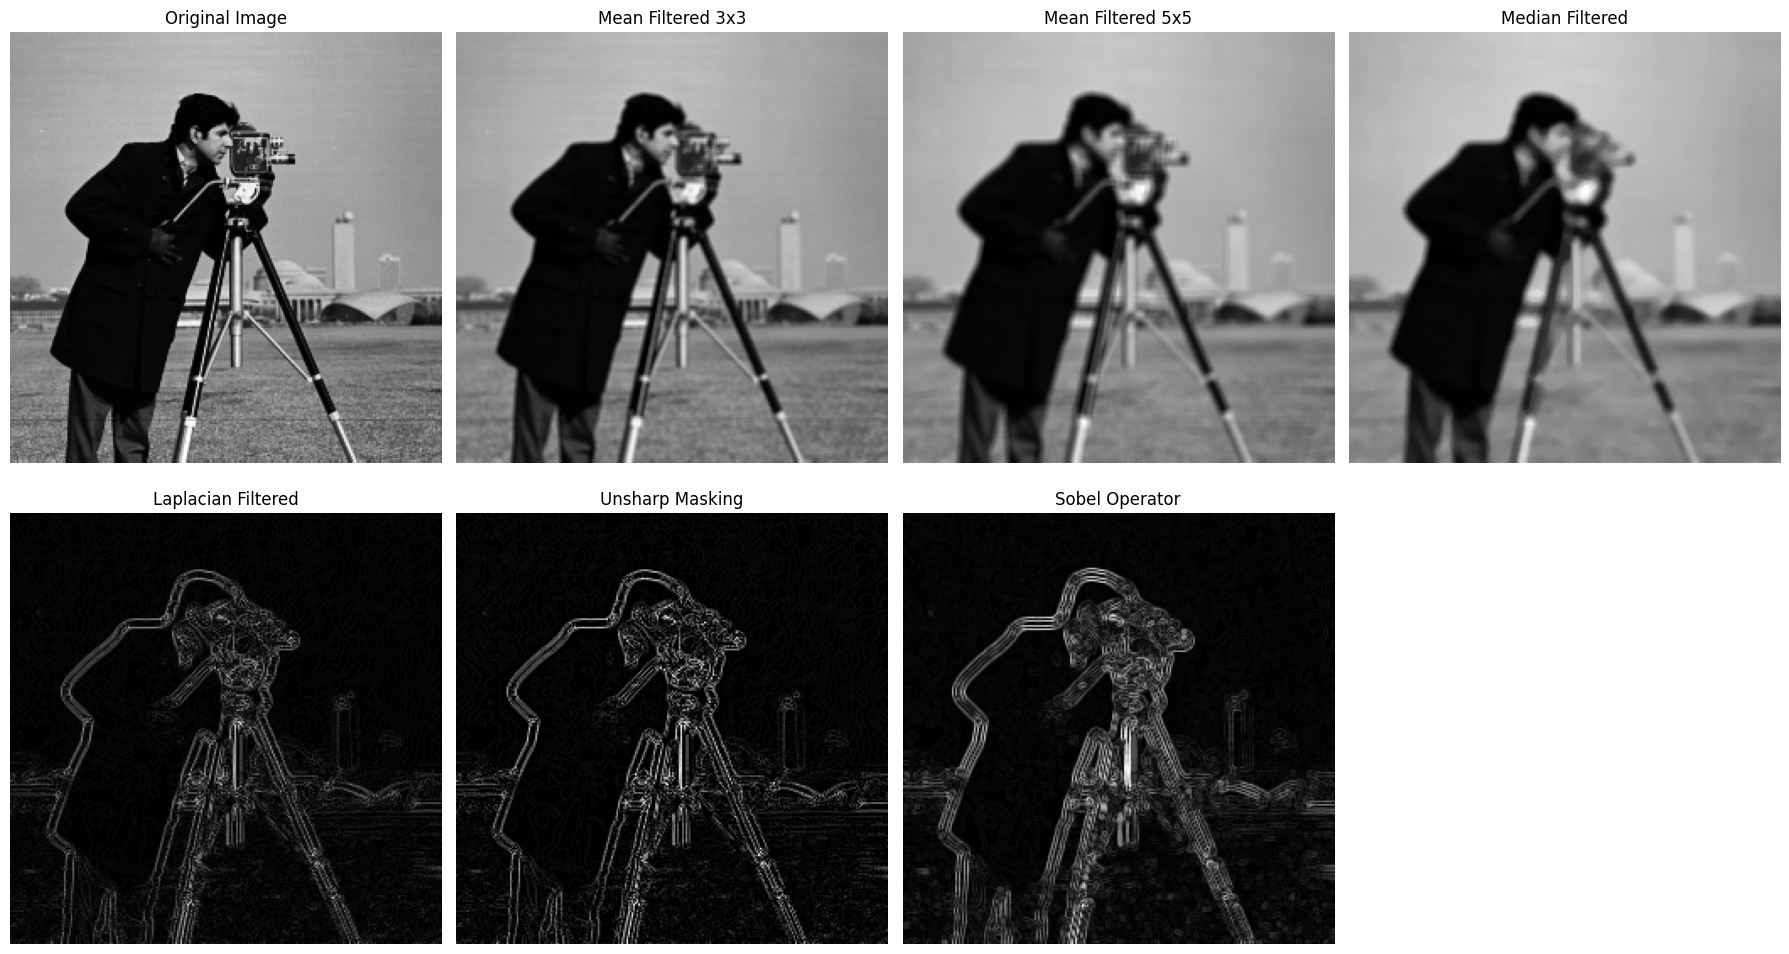

In [40]:
# 3.19 AI1 刘兴琰
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_mean_filter(image, kernel_size=(3, 3)):
    return cv2.blur(image, kernel_size)

def apply_median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

def apply_laplacian_filter(image):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    return convert_depth_for_display(laplacian)

def unsharp_mask(image, strength=1.5):
    gaussian_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    sharpened = cv2.addWeighted(image, strength, gaussian_blurred, -0.5, 0)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

def apply_sobel_operator(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(grad_x, 2), 0.5, cv2.pow(grad_y, 2), 0.5, 0))

    return convert_depth_for_display(sobel)

def convert_depth_for_display(image):
    abs_image = np.absolute(image)
    return np.uint8(abs_image / abs_image.max() * 255)

def is_grayscale(image):
    return len(image.shape)==2 or image.shape[2]==1

processed_images = []
image_paths = ['4.jpg','256.tif']
original_images = [cv2.imread(image_path, cv2.IMREAD_UNCHANGED) for image_path in image_paths]

for original_image in original_images:
    if original_image is None:
        raise ValueError("Unable to load image from path")

    if is_grayscale(original_image):
        original_image_display = original_image
    else:
        original_image_display = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    image_mean_filtered_3x3 = apply_mean_filter(original_image, kernel_size=(3, 3))

    image_mean_filtered_5x5 = apply_mean_filter(original_image, kernel_size=(5, 5))

    image_median_filtered = apply_median_filter(image_mean_filtered_5x5)
    image_laplacian = apply_laplacian_filter(image_median_filtered)
    image_unsharp = unsharp_mask(image_laplacian)
    image_sobel = apply_sobel_operator(image_unsharp)

    processed_images.append([
        original_image_display,
        image_mean_filtered_3x3,
        image_mean_filtered_5x5,
        image_median_filtered,
        image_laplacian,
        image_unsharp,
        image_sobel
    ])


for idx, images in enumerate(processed_images):
    plt.figure(figsize=(18, 10))  
    titles = ["Original Image", "Mean Filtered 3x3", "Mean Filtered 5x5", "Median Filtered", "Laplacian Filtered", "Unsharp Masking", "Sobel Operator"]
    for i in range(7):  
        plt.subplot(2, 4, i + 1)  
        if is_grayscale(images[i]):
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')

    plt.tight_layout()
    plt.show()


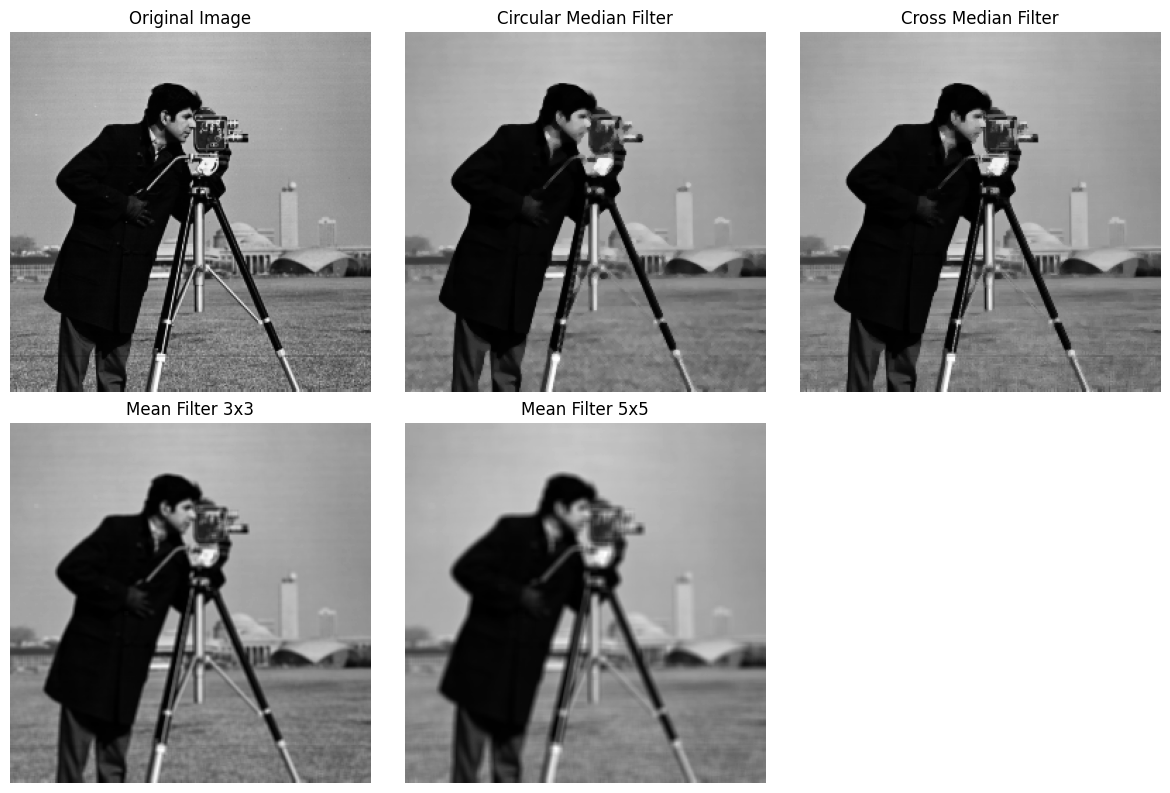

In [37]:
# 中值滤波处理图片
import cv2
import numpy as np
import matplotlib.pyplot as plt

def create_circular_kernel(kernel_size):
    r = kernel_size // 2
    y, x = np.ogrid[-r:r+1, -r:r+1]
    return (x**2 + y**2 <= r**2).astype(int)

def create_cross_kernel(kernel_size):
    kernel = np.zeros((kernel_size, kernel_size), dtype=int)
    center = kernel_size // 2
    kernel[center, :] = 1
    kernel[:, center] = 1
    return kernel

def apply_custom_median_filter(image, kernel):
    kernel_size = kernel.shape[0]
    pad_size = kernel_size // 2
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    result_image = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            kernel_values = region[kernel > 0]
            result_image[i, j] = np.median(kernel_values)

    return result_image

def apply_mean_filter(image, kernel_size=(3, 3)):
    return cv2.blur(image, kernel_size)

image_path = '256.tif'  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    raise ValueError("Image not found or unable to read")

circular_kernel = create_circular_kernel(5)
cross_kernel = create_cross_kernel(5)
circular_filtered_image = apply_custom_median_filter(image, circular_kernel)
cross_filtered_image = apply_custom_median_filter(image, cross_kernel)

mean_filtered_image_3x3 = apply_mean_filter(image, (3, 3))
mean_filtered_image_5x5 = apply_mean_filter(image, (5, 5))

plt.figure(figsize=(12, 8))
images = [image, circular_filtered_image, cross_filtered_image, mean_filtered_image_3x3, mean_filtered_image_5x5]
titles = ["Original Image", "Circular Median Filter", "Cross Median Filter", "Mean Filter 3x3", "Mean Filter 5x5"]

for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()